<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Modeling And Simulation   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 5: Solving Problems with Monte-Carlo Simulation Technique
In this Notebook you learn how to apply  Monte-Carlo (MC) Method to solve some problems. The methode provides generally approximate solutions to problems that are hard to solve analytically or numerically. Many of the functions we will use are implemented with the uses of pseudo-random numbergenerators. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1- The Probabilistic Basis for Monte-Carlo:  
#### Law of Large Numbers (LLN)
We want to estimate the quantity of the mean of a given set of random variables $X$. We denote the estimated mean by  $\hat{\mu}_n$ and the true mean by $\mu = E[X]$.

The LLN states that the more random trials that are performed, the more accurate the approximated quantity $\hat{\mu}_n$ will become:
$ 
\hat{\mu}_n= \lim_{{n\to\infty}} \left(\frac {1}{n} \sum_{k=1}^n X_k \right) \xrightarrow{} \mu
 $

The following example shows an estimation of the mean value of a set of random variables generated from an uniform destribution $U[a,b]$

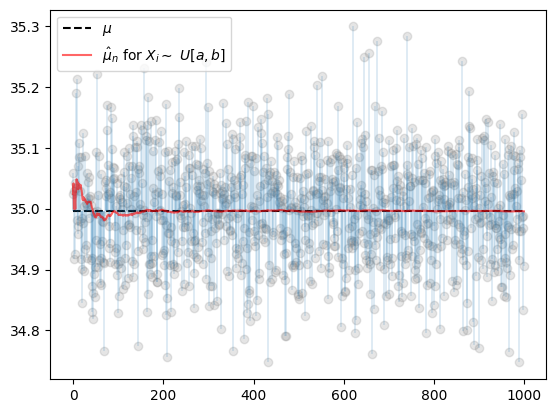

In [11]:
N = 1000
estimated_means,data = np.zeros(N),np.zeros(N)
a,b=30,40
for i in range(N):
  
    #for each itteration, generate the mean of N samples from an uniform destribution U[a,b] 
    data[i] = np.random.uniform(a, b, N).mean()
    #for each itteration, estimate the mean
    estimated_means[i] = np.mean(data[:i+1])
   
    
#get the true mean of data    
μ= data.mean()

#generate x data axis
x=np.arange(N)

# Plotting
plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ, data, lw=0.2)
plt.scatter(x, data, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means, 'r-',  alpha=0.6, label=axlabel)

plt.legend()
plt.show()

Now, try to change the N value by making it bigger for the code above and execute again the code. 

 In Statistics, theory tells us  that the difference of $\hat{\mu}_n$ from $\mu$ should be of order $\frac{\sigma}{\sqrt{n}}$.
 In other words:
  $ 
|\hat{\mu}_n- \mu| \approx \frac{\sigma}{\sqrt{n}}
 $
 
 Let's confirm that throught plotting the erroe:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3312\1495552916.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,sigma/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")


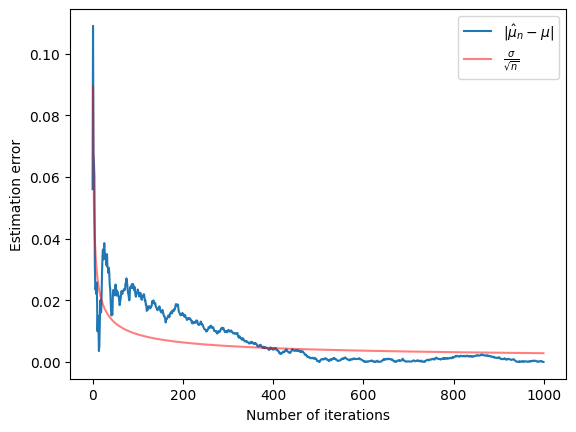

In [5]:
sigma= data.std()
plt.plot(x, np.abs(estimated_means-μ), label='$|\hat{\mu}_n- \mu|$')
plt.plot(x,sigma/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error")
plt.legend()
plt.show()


### Challenge 01:
Change the codes above to estimate the mean value of a set of random variables that are generated from:

1. An exponential destribution  with $λ = 1.5$.   
2. A binomial destribution with $n=10$ trials and $p=0.5$ probability of success     


Plot also the absolute error for the two case studies.
#### Hint:

* Recall that the probability density functionan of an exponantial distribution is defined by the following equatin:
$P(x) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$, where $λ=\frac{1}{\beta}$.
The exponantial distribution can be generated using the numpy python function: `numpy.random.exponential(scale=1.0, size=None)`, where `scale=λ`.
* The probability density for the binomial distribution is given as follows:
$P(N) = \binom{n}{N}p^N(1-p)^{n-N}$. The binomial distribution can be generated using the numpy python function: `numpy.random.binomial(n, p, size=None)`.





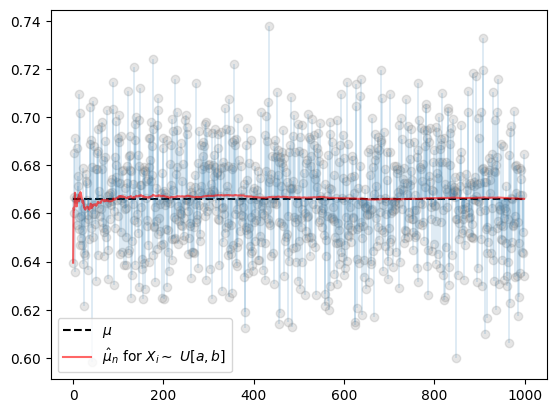

In [ ]:
#your code here for estimating the mean of the exponential destribution
N = 1000
lmbda = 1.5
estimated_means_exp, data_exp = np.zeros(N), np.zeros(N)
for i in range(N):
    data_exp[i] = np.random.exponential(scale=1/lmbda, size=N).mean()
    estimated_means_exp[i] = np.mean(data_exp[:i+1])
    
μ_exp = data_exp.mean()
sigma_exp = data_exp.std()

x = np.arange(N)

# Plotting
plt.plot(x, [μ_exp] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ_exp, data_exp, lw=0.2)
plt.scatter(x, data_exp, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means_exp, 'r-',  alpha=0.6, label=axlabel)

plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3312\4199826861.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,sigma_exp/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")


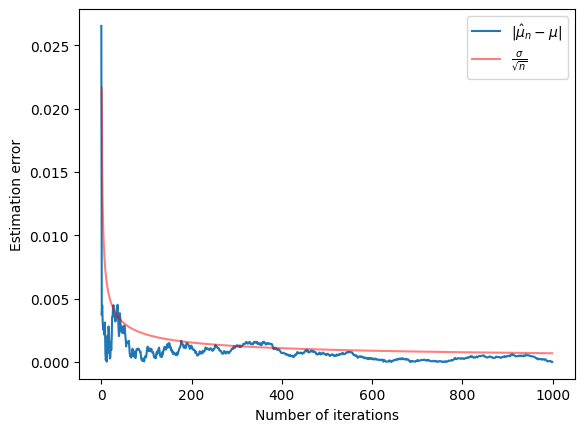

In [14]:
sigma_exp= data_exp.std()
plt.plot(x, np.abs(estimated_means_exp-μ_exp), label='$|\hat{\mu}_n- \mu|$')
plt.plot(x,sigma_exp/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error")
plt.legend()
plt.show()

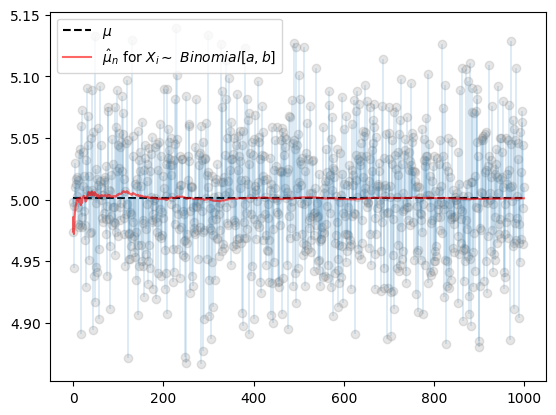

In [15]:
#your code here for estimating the mean of the binomial destribution
N = 1000
estimated_means_binomial, data_binomial = np.zeros(N),np.zeros(N)
n = 10
p = 0.5
for i in range(N):
  
    #for each itteration, generate the mean of N samples from an exponential destribution Exp[a,b] 
    data_binomial[i] = np.random.binomial(n, p, N).mean()
    #for each itteration, estimate the mean
    estimated_means_binomial[i] = np.mean(data_binomial[:i+1])
    
#get the true mean of data    
μ_binomial = data_binomial.mean()

x=np.arange(N)

# Plotting
plt.plot(x, [μ_binomial] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ_binomial, data_binomial, lw=0.2)
plt.scatter(x, data_binomial, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $Binomial[a,b]$' 
plt.plot(x, estimated_means_binomial, 'r-',  alpha=0.6, label=axlabel)

plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3312\3173368799.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,sigma_binomial/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")


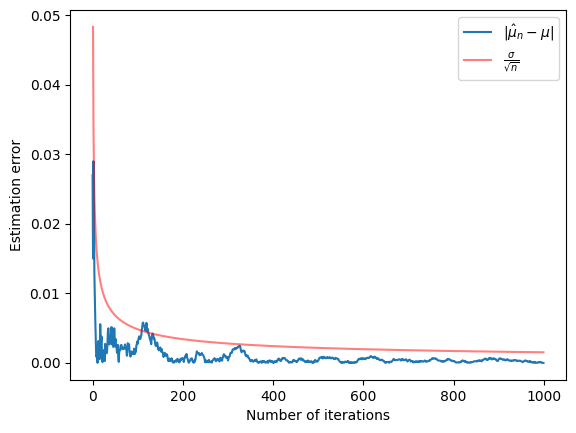

In [16]:
sigma_binomial = data_binomial.std()
plt.plot(x, np.abs(estimated_means_binomial-μ_binomial), label='$|\hat{\mu}_n- \mu|$')
plt.plot(x,sigma_binomial/np.sqrt(x), color="r", alpha=0.5, label="$\\frac{\sigma}{\sqrt{n}}$")
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error")
plt.legend()
plt.show()

#### The Central Limit Theorem (CLT):
The central limit theorem states that the distribution of independent sample means is an approximately normal distribution, even if the population is not normally distributed.
In oder wards, in CLT, given a dataset with an unknown distribution, the sample’s means will approximate the normal distribution.

$ 
\hat{\mu}_n \xrightarrow{n \to \infty}  \mathcal{N}\left(\mu,\sigma^2/n\right) \Longleftrightarrow \left(Z=\frac{\hat{\mu}_n - \mu}{ \sigma/\sqrt{n}}\right) \xrightarrow{n \to \infty}  \mathcal{N}(0,1)
 $


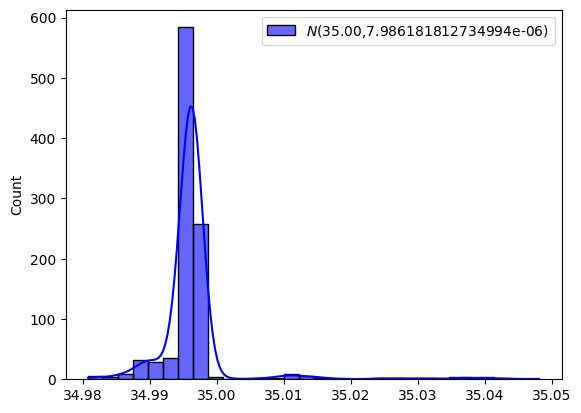

In [25]:
import seaborn as sns

l="$N$({0:.2f},{1})".format(μ,sigma*sigma/N)
sns.histplot(estimated_means, kde=True, label=l, bins=30, color='blue', alpha=0.6)
plt.legend()
plt.show()



### Challenge 02:
Plot the density distributions of the estimated means calculated previously using the exponential and the binomial distributions to testify the central limit theorem (CLT) 

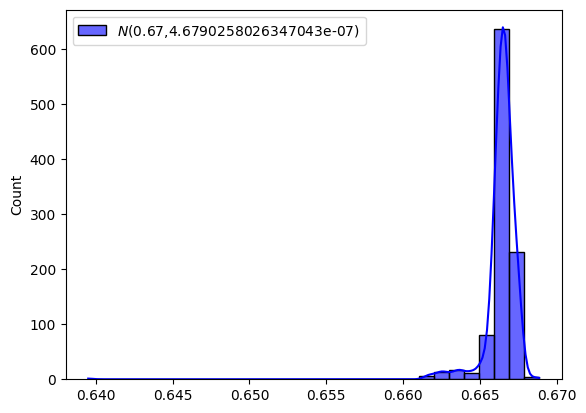

In [26]:
#your code here for plotting the density distributions of the estimated means for the exponential distribution
l="$N$({0:.2f},{1})".format(μ_exp,sigma_exp*sigma_exp/N)
sns.histplot(estimated_means_exp, kde=True, label=l, bins=30, color='blue', alpha=0.6)
plt.legend()
plt.show()

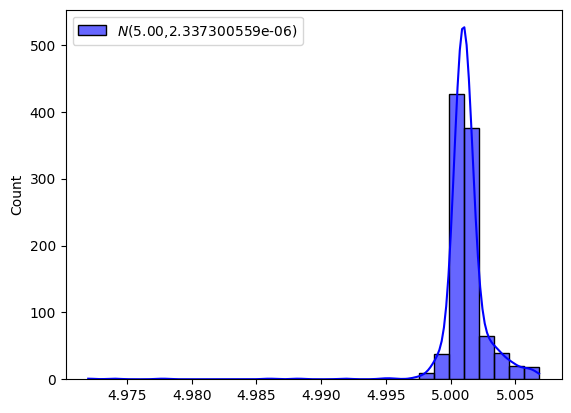

In [27]:
#your code here for plotting the density distributions of the estimated means for the binomial distribution
l="$N$({0:.2f},{1})".format(μ_binomial,sigma_binomial*sigma_binomial/N)
sns.histplot(estimated_means_binomial, kde=True, label=l, bins=30, color='blue', alpha=0.6)
plt.legend()
plt.show()

#### Illustration of Confidence Interval
From Statistic theory,  $95\%$ of the time, $\hat{\mu}_n$ will be within $1.96 \frac{\sigma}{\sqrt{n}}$
from $\mu$.

Alternatively, for $95\%$ of the time, $\mu$ will be within $1.96 \frac{\sigma}{\sqrt{n}}$
from $\hat{\mu}_n$.

Hence, we call the interval:
 $
     \hat{\mu}_n \pm 1.96 \frac{\sigma}{\sqrt{n}}=\left[ \hat{\mu}_n-1.96 \frac{\sigma}{\sqrt{n}}, \hat{\mu}_n+1.96 \frac{\sigma}{\sqrt{n}} \right]
 $

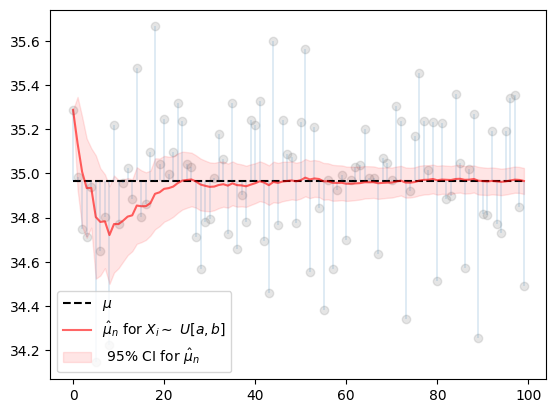

In [30]:
N = 100
estimated_means,data,ci = np.empty(N), np.zeros(N),np.zeros(N)
a,b=30,40
for i in range(N):
  
    #for each itteration, generate the mean of N samples from an uniform destribution U[a,b] 
    data[i] = np.random.uniform(a, b, N).mean()
    #for each itteration, estimate the mean
    estimated_means[i] = np.mean(data[:i+1])
    #Compute confidence interval ci
    ci[i] = 1.96 * np.std(data[:i+1]) / np.sqrt(i+1)
    
#get the true mean of data    
μ= data.mean()

#generate x data axis
x=np.arange(N)

# Plotting
plt.plot(x, [μ] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ, data, lw=0.2)
plt.scatter(x, data, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means, 'r-',  alpha=0.6, label=axlabel)
plt.fill_between(x, (estimated_means-ci), (estimated_means+ci), color='r', alpha=0.1, label=" $95\%$ CI for $\hat{\mu}_n$ ")

#upper = np.percentile(estimated_means, [97.5]*N)
#plt.plot(x, upper, 'b');

plt.legend()
plt.show()


### Challenge 03:
Illustrate the confidenc interval for the estimated means calculated previously using the exponential and the binomial distributions  

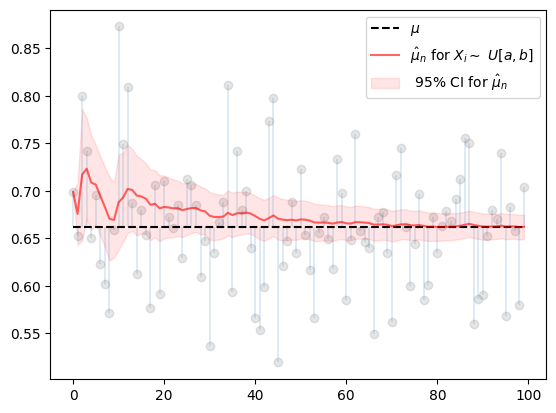

In [31]:
#your code here for illustrating the CI of the estimated means for the exponential distribution
N = 100
estimated_means_exp, data_exp, ci_exp = np.empty(N), np.zeros(N), np.zeros(N)
lmbda = 1.5

for i in range(N):
    data_exp[i] = np.random.exponential(scale=1.0/lmbda, size=N).mean()
    estimated_means_exp[i] = np.mean(data_exp[:i+1])
    ci_exp[i] = 1.96 * np.std(data_exp[:i+1]) / np.sqrt(i+1)
    

μ_exp = data_exp.mean()
x = np.arange(N)

# Plotting
plt.plot(x, [μ_exp] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ_exp, data_exp, lw=0.2)
plt.scatter(x, data_exp, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means_exp, 'r-',  alpha=0.6, label=axlabel)
plt.fill_between(x, (estimated_means_exp-ci_exp), (estimated_means_exp+ci_exp), color='r', alpha=0.1, label=" $95\%$ CI for $\hat{\mu}_n$ ")

#upper = np.percentile(estimated_means, [97.5]*N)
#plt.plot(x, upper, 'b');

plt.legend()
plt.show()


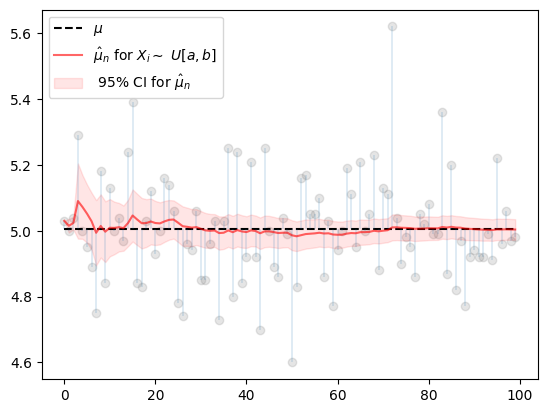

In [32]:
#your code here for illustrating the CI of the estimated means for the binomial distribution
N = 100
estimated_means_binom, data_binom, ci_binom = np.empty(N), np.zeros(N), np.zeros(N)
n, p = 10, 0.5 

for i in range(N):
    data_binom[i] = np.random.binomial(n, p, size=N).mean()
    estimated_means_binom[i] = np.mean(data_binom[:i+1])
    ci_binom[i] = 1.96 * np.std(data_binom[:i+1]) / np.sqrt(i+1)
    

μ_binom = data_binom.mean()
x = np.arange(N)

# Plotting
plt.plot(x, [μ_binom] * N, 'k--', lw=1.5, label='$\mu$')
plt.vlines(x, μ_binom, data_binom, lw=0.2)
plt.scatter(x, data_binom, color='grey', alpha=0.2)
axlabel = '$\hat{\mu}_n$ for $X_i \sim$ $U[a,b]$' 
plt.plot(x, estimated_means_binom, 'r-',  alpha=0.6, label=axlabel)
plt.fill_between(x, (estimated_means_binom-ci_binom), (estimated_means_binom+ci_binom), color='r', alpha=0.1, label=" $95\%$ CI for $\hat{\mu}_n$ ")

#upper = np.percentile(estimated_means, [97.5]*N)
#plt.plot(x, upper, 'b');

plt.legend()
plt.show()

### 2- Applications of Monte-Carlo Simulation Technique

### 2.1- Pi Estimation 

<figure>
  <IMG src="figures/pi.png" WIDTH=150 height="150" ALIGN="right">
</figure>

* The area of the circle is $\pi r^2$,
* The area of the square is $\text{width}^2 = (2r)^2 = 4r^2$.

* If we divide the area of the circle, by the area of the square we get $\pi/4$.

* The same ratio can be used between the number of points within the square and the number of points within the circle. Hence to estimate $\pi$ can be estimated as follows:
   
$$ \pi ≈ 4 \times \frac{\text{number of points in the circle}}{\text{total number of points}} $$

 The code below simulate the steps on estimating the value of $\pi$ using Monte-Carlo Simulation Technique:

In [41]:
import numpy as np
np.random.seed(42)
N = 1000000
inside = []
outside = []

points = np.random.uniform(-1, 1, size=(N,2))
for point in points:   
    x = point[0]
    y = point[1]
    
    if (np.sqrt(x**2 + y**2)) < 1:
        inside.append((x, y))
    else:
        outside.append((x, y))

pi = 4*len(inside) /  len(points)
print("Proportion  inside: {:.9f}".format(pi))

Proportion  inside: 3.141952000


And the graphical plot solution is as follows:

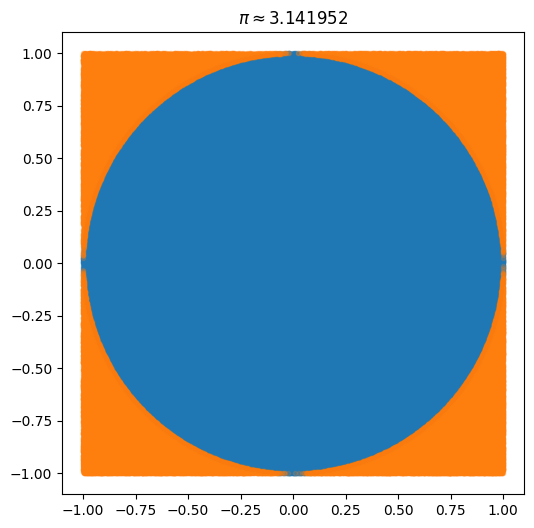

In [42]:
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.2)
plt.scatter([x[0] for x  in outside], [x[1] for x  in outside], marker=".", alpha=0.2)
plt.title('$\pi\\approx' + str(pi) + '$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

No try to make the number of the value N bigger and see how the value of $\pi$ will approximate the true value once N is much bigger.

### Challenge 04:
Estimate the area of a rectangle of width=3 and hight=2 using a Monte-Carlo Simulation Technique.

#### Hint

* Generate a sequence of $N=10000$ independent random points with a square of $4x4$ area centred at the origin.
* Compute the number of points ($R$) that are inside the rectangle.
* Then, the area of the rectangle $A\approx \text{Square}_{\text{area}}*\frac{R}{N}$ 



Proportion  inside: 6.161600000


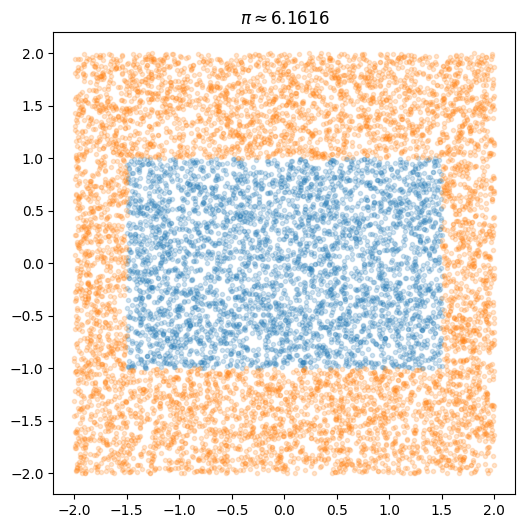

In [43]:
#your code here

N = 10000
inside = []
outside = []

points = np.random.uniform(-2, 2, size=(N,2))

for point in points:   
    x = point[0]
    y = point[1]
    
    if (x < 1.5 and y < 1 and x > -1.5 and y > -1 )  :
        inside.append((x, y))
    else:
        outside.append((x, y))

pi = 16*(len(inside) /  len(points))
print("Proportion  inside: {:.9f}".format(pi))

plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.2);
plt.scatter([x[0] for x  in outside], [x[1] for x  in outside], marker=".", alpha=0.2);
plt.title('$\pi\\approx' + str(pi) + '$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

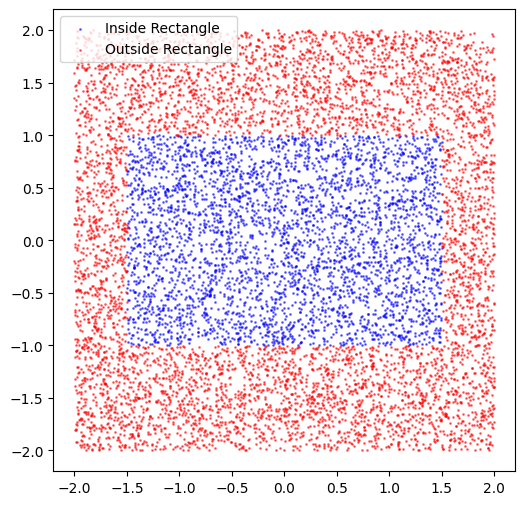

In [45]:
## Solution 2
square_side = 4  
square_area = square_side ** 2  # 4x4 = 16

rect_width = 3
rect_height = 2

N = 10000
x = np.random.uniform(-square_side/2, square_side/2, N)
y = np.random.uniform(-square_side/2, square_side/2, N)

inside_rectangle = (np.abs(x) <= rect_width / 2) & (np.abs(y) <= rect_height / 2)

R = np.sum(inside_rectangle)

estimated_area = square_area * (R / N)

plt.figure(figsize=(6,6))
plt.scatter(x[inside_rectangle], y[inside_rectangle], color='blue', alpha=0.5, s=1, label="Inside Rectangle")
plt.scatter(x[~inside_rectangle], y[~inside_rectangle], color='red', alpha=0.5, s=1, label="Outside Rectangle")
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


In [47]:
print(f"estimated area of the rectangle: {estimated_area:.9f}")

estimated area of the rectangle: 6.000000000


### Challenge 05:
Using Monte-Carlo Simualtion Technique, estimate the surface delimited by the solid line as depicted in the following Figure:

<figure>
  <IMG src="figures/pool.png" WIDTH=250 height="100" ALIGN="right">
</figure>



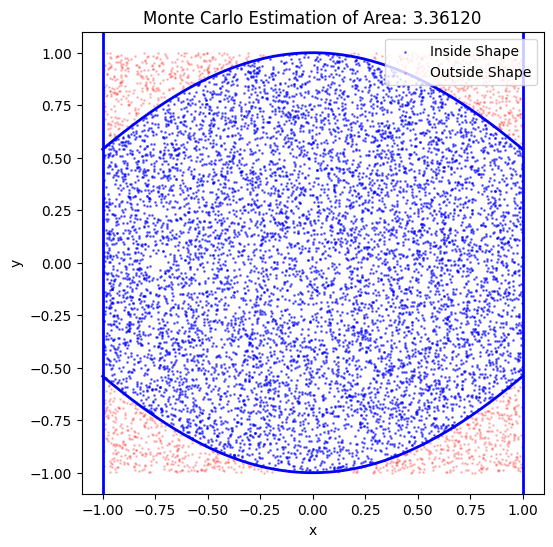

In [50]:
#your code here
N = 10000  
x = np.random.uniform(-1, 1, N)  
y = np.random.uniform(-1, 1, N)  

inside_shape = (y >= -np.cos(x)) & (y <= np.cos(x))

R = np.sum(inside_shape)

A_box = 4  
estimated_area = A_box * (R / N)

plt.figure(figsize=(6,6))
plt.scatter(x[inside_shape], y[inside_shape], color='blue', alpha=0.5, s=1, label="Inside Shape")
plt.scatter(x[~inside_shape], y[~inside_shape], color='red', alpha=0.2, s=1, label="Outside Shape")

x_curve = np.linspace(-1, 1, 300)
plt.plot(x_curve, np.cos(x_curve), 'b-', lw=2)
plt.plot(x_curve, -np.cos(x_curve), 'b-', lw=2)
plt.axvline(-1, color='b', lw=2)
plt.axvline(1, color='b', lw=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Monte Carlo Estimation of Area: {estimated_area:.5f}")
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

### 2.2- Integral Estimation 
<figure>
  <IMG src="figures/integrals.png" WIDTH=250 height="100" ALIGN="right">
</figure>
Monte-Carlo Technique can be also used to estimae Integrals: $\int_I f(x) dx$ by following the steps below:


* Sample points within $\int_I f(x) dx$
* Calculate the mean of the random variable within $I$
* Integral = sampled area × mean


#### Example 01: Estimating $\int_{1}^5 x^2 dx$
    The general solution can be found using sympy as follows:

In [57]:
import sympy as sy
x = sy.Symbol("x")
i = sy.integrate(x**2) 
i.subs(x, 5) - i.subs(x, 1)
float(i.subs(x, 5) - i.subs(x, 1))

41.333333333333336

And the estimated value using Monte-Carlo simulation technique is:

In [58]:
N = 100000
accum = 0
for i in range(N):
    x = np.random.uniform(1, 5)
    accum += x**2
area = 5-1
integral = area*accum/float(N)
print(integral)

41.2269635582312


 #### Example 02: Estimating $\int_{1}^3 e^{x^2} dx$
 The general solution can be found using sympy as follows:

In [59]:
x = sy.Symbol("x")
i = sy.integrate(sy.exp(x**2)) 
i.subs(x, 3) - i.subs(x, 1) 
float(i.subs(x, 3) - i.subs(x, 1))

1443.082471146807

And the estimated value using Monte-Carlo simulation technique is:

In [60]:
N = 100000
accum = 0
for i in range(N):
    x = np.random.uniform(1, 3)
    accum += np.exp(x**2)
area = 3 - 1
integral = area * accum / float(N)
print(integral)

1442.5668563128006


#### Example 03: Estimating the double integral $\int_{0}^1 \int_{4}^6 cos(x^4)+ 3y^2 dx dy$
The general solution can be found using sympy as follows:

In [61]:
x = sy.Symbol("x")
y = sy.Symbol("y")
d1 = sy.integrate(sy.cos(x**4) + 3 * y**2, x)
d2 = sy.integrate(d1.subs(x, 6) - d1.subs(x, 4), y) 
sol = d2.subs(y, 1) - d2.subs(y, 0)
float(sol)

2.005055086749674

In [62]:
N = 100000
accum = 0
for i in range(N):
    x = np.random.uniform(4, 6)
    y = np.random.uniform(0, 1)
    accum += np.cos(x**4) + 3 * y * y
volume = (6-4) * (1-0)
integral = volume * accum/float(N)
print(integral)

2.020006628046578


### Challenge 6:
Estimate the following Integrals using Monte-Carlo Simulation Technique:


1. $\int_{0}^4 (x *\cos (7x) + \sin (13x)) dx $


In [68]:
x = sy.Symbol("x")
i = sy.integrate(x * sy.cos(7*x) + sy.sin(13*x), x)
sol = i.subs(x, 4) - i.subs(x, 0)
float(sol)

0.2042109559512991

In [69]:
N = 100000
accum = 0
for _ in range(N):
    x = np.random.uniform(0, 4)
    accum += x * np.cos(7*x) + np.sin(13*x)

area = 4 - 0
integral = area * accum / float(N)
float(integral)

0.20134722414918982

2. $\int_{2}^8 \int_{1}^5 (\frac{x}{\sqrt(x^2-1)}+ x * y^3)  dxdy $


In [70]:
x = sy.Symbol("x")
y = sy.Symbol("y")

d1 = sy.integrate(x / sy.sqrt(x**2 - 1) + x * y**3, x)
d2 = sy.integrate(d1.subs(x, 8) - d1.subs(x, 2), y)

sol = d2.subs(y, 5) - d2.subs(y, 1)
float(sol)

4704.820812502499

In [72]:
N = 100000
accum = 0
for _ in range(N):
    x = np.random.uniform(2, 8)
    y = np.random.uniform(1, 5)
    accum += x / np.sqrt(x**2 - 1) + x * y**3

area = (8 - 2) * (5 - 1)
integral = area * accum / float(N)
float(integral)

4718.497322683167

3. $\int_{0}^5 \int_{2}^4 \int_{1}^3 (x^3 - y^2 + z)  dxdydz $

 

In [74]:
x = sy.Symbol("x")
y = sy.Symbol("y")
z = sy.Symbol("z")

d1 = sy.integrate(x**3 - y**2 + z, x)
d2 = sy.integrate(d1.subs(x, 3) - d1.subs(x, 1), y)
d3 = sy.integrate(d2.subs(y, 4) - d2.subs(y, 2), z)

sol = d3.subs(z, 5) - d3.subs(z, 0)
float(sol)

63.333333333333336

In [77]:
N = 100000
accum = 0
for _ in range(N):
    x = np.random.uniform(1, 3)
    y = np.random.uniform(2, 4)
    z = np.random.uniform(0, 5)
    accum += x**3 - y**2 + z

volume = (3 - 1) * (4 - 2) * (5 - 0)
integral = volume * accum / float(N)
float(integral)

64.08409117503068

### 2.3- Monte-Carlo Applications  to Uncertainty Analysis

Uncertainty Analysis investigates the uncertainty of variables that are used in decision-making problems.
The goal is to:

* Quantify uncertainties propagated in models variables.
* Understand and model it to make better decisions

 
#### Example:
Let $X$ be a measure uniformly distributed over $[-100, 100]$  and $Y$ another measure exponentially distributed with $\beta=2.25$. We are interested in the distribution of the output variable:
    $
     Z= X*Y
  $

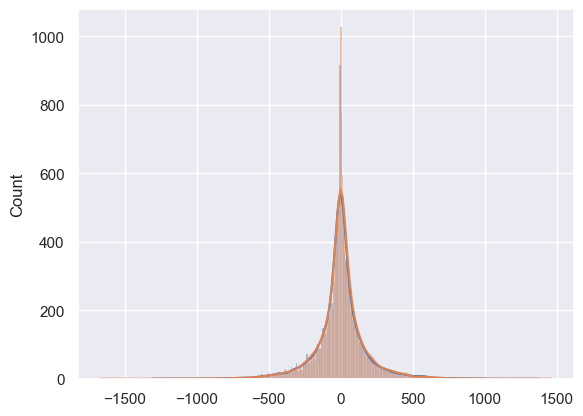

In [83]:
import  numpy as np
N = 10000
def Z():
    x = np.random.uniform(-100, 100)
    y = np.random.exponential(2.25)
    return x * y

sim = np.zeros(N) 
for i in range(N):
    sim[i] = Z()
    
sns.histplot(sim, kde=True)
plt.show()

Note that the output result approximate a normal distribution

### Challenge 7:
The body mass index ($BMI$) is the ratio $\frac{Body_{mass}(𝑘𝑔)}{body_{height} (𝑚^2)}$ 
This ratio is often used as an indicator of obesity or mal nutrition.
#### Task:
Calculate your $BMI$ and the associated uncertainty interval, assuming:

* your weight scale tells you that you weigh $84$ $kg$ (precision shown to the nearest kilogram)
* a tape measure says you are between $181$ and $182$ $cm$ tall ( most likely value is $181.5$ $cm$ )
 
What is your observation on the resulting output?

#### Hint:
Modify the code above to run a Monte-Carlo simulation on the model $BMI$ with

* $\text{Body}_{\text{mass}}$ drawn froma $𝑈(83.5,84.5)$ uniform distribution.
* $\text{body}_{\text{height}}$ drawn froma $𝑇(1.81,1.815,1.82)$ triangular distribution (np.random.triangular(left, mode, right, size=None)).    
</ul> 

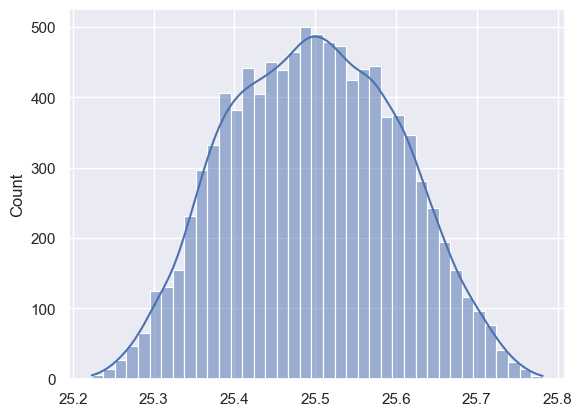

In [84]:
#Your Code Here

N = 10000
def Z():
    x = np.random.uniform(83.5, 84.5)
    y = np.random.triangular(1.81,1.815,1.82) 
    return x / y**2

sim = np.zeros(N) 
for i in range(N):
    sim[i] = Z()
    

sns.histplot(sim, kde=True)
plt.show()